# Group 36 - Emanuel Caravaggio, Patrick Favret, Junoh Loy, Edward Tanurkov

# Dataset Choice

### Problem Details

- Classification problem
- Title: **Give Me Some Credit**
- Kaggle Link: https://www.kaggle.com/competitions/GiveMeSomeCredit

### Rationale of Choice

- **Interest**: Overall interest in this project by all group members, based on application and practicality to real world problems, decent straight-forwardness in understand variables, learning experience in finances and factors surrounding them
- **Feasibility**: Low-dimensional data which makes it simpler to understand and see what factors play into the classification (including correlations), easy-to-summarize and visualize statistics given the datatypes (helping in understanding)
- **Potential for Learning**: Learn how to pre-process data in an outlier-heavy classification problem (will normalization/standardization even help?), understand if some variables are even key to classifying the target variable even with the already low dimensionality (practice optimization via dimensionality reduction techniques), learn to choose machine learning models/algorithms that are best-suited for this specific problem and the nuances that come with the data

# Data Dictionary

| Variable Name                        | Input or Target?   | Variable Description                                                                                                                                                                                                                                             | Categorical or Numerical?   | Type                     |
|:-------------------------------------|:-------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------|:-------------------------|
| SeriousDlqin2yrs                     | Target Variable    | The SeriousDlqin2yrs variable is our target variable. It’s a binary indicator predicting whether a person will be 90 days or more past due on a bank payment/loan (a serious deliquency) within the next 2 years.                                                | Categorical                 | Binary (Yes/No or 1/0)   |
| RevolvingUtilizationOfUnsecuredLines | Input Variable     | The RevolvingUtilizationOfUnsecuredLines variable represents the ratio of the amount of credit a borrower is using from an unsecured personal line of credit (real estate and installment debt are not involved) compared to a borrowers total available credit. | Numerical                   | Percentage               |
| age                                  | Input Variable     | The age variable represents the age of the borrower in years.                                                                                                                                                                                                    | Numerical                   | Non-negative Integer     |
| NumberOfTime30-59DaysPastDueNotWorse | Input Variable     | The NumberOfTime30-59DaysPastDueNotWorse variable represents the number of times a borrower has been strictly between 30 and 59 days past due on a bank payment/loan in the last 2 years.                                                                        | Numerical                   | Non-negative Integer     |
| DebtRatio                            | Input Variable     | The DebtRatio variable represents a borrowers personal debt ratio, which is the borrowers total monthly debt payments (inclduing housing, loans, credit cards, alimony, etc.) divided by the borrowers gross monthly income.                                     | Numerical                   | Percentage               |
| MonthlyIncome                        | Input Variable     | The MonthlyIncome variable represents the total amount of money a borrower earns in a month before taxes and deductions.                                                                                                                                         | Numerical                   | Non-negative Real Number |
| NumberOfOpenCreditLinesAndLoans      | Input Variable     | The NumberOfOpenCreditLinesAndLoans variable represents the number of lines of credit and open loans (car loans, mortgage, etc.) a borrower currently has.                                                                                                       | Numerical                   | Non-negative Integer     |
| NumberOfTimes90DaysLate              | Input Variable     | The NumberOfTimes90DaysLate variable represents the number of times a borrower has been 90 days or more past due on a bank payment/loan.                                                                                                                         | Numerical                   | Non-negative Integer     |
| NumberRealEstateLoansOrLines         | Input Variable     | The NumberRealEstateLoansOrLines variable represents the number of morgages and real estate loans (including home equity lines of credit) that a borrower currently has.                                                                                         | Numerical                   | Non-negative Integer     |
| NumberOfTime60-89DaysPastDueNotWorse | Input Variable     | The NumberOfTime60-89DaysPastDueNotWorse variable represents the number of times a borrower has been strictly between 60 and 89 days past due on a bank payment/loan in the last 2 years                                                                         | Numerical                   | Non-negative Integer     |
| NumberOfDependents                   | Input Variable     | The NumberOfDependents variable represents the amount of people financially reliant on a borrower not including the borrower themselves. This can include children, spouses, other family members, etc.                                                          | Numerical                   | Non-negative Integer     |



In [12]:
import pandas as pd
import numpy as np

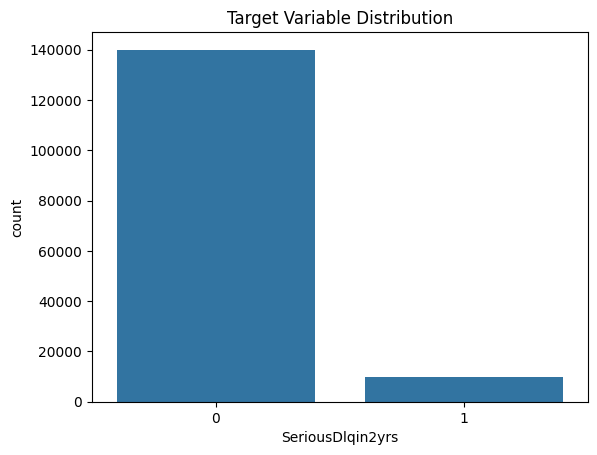

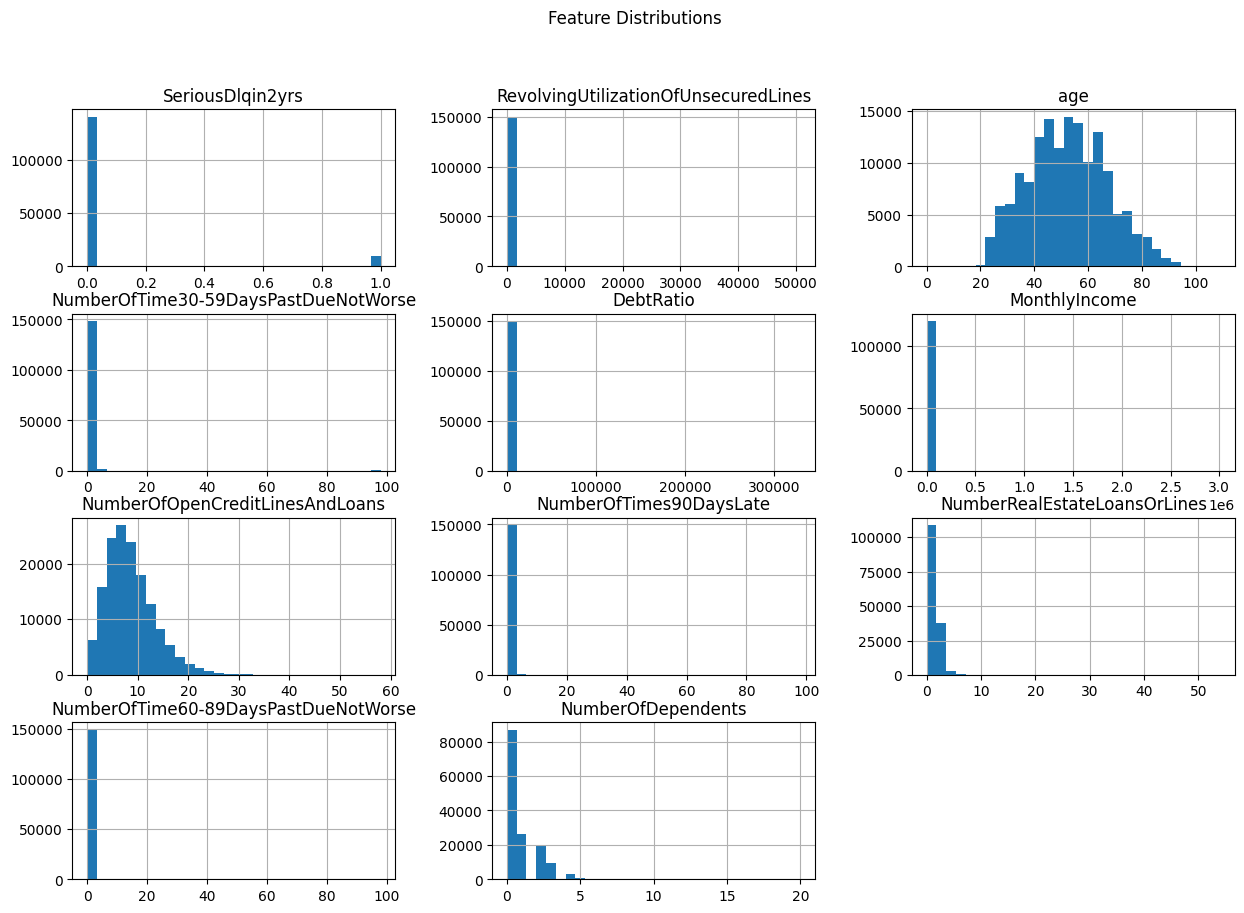

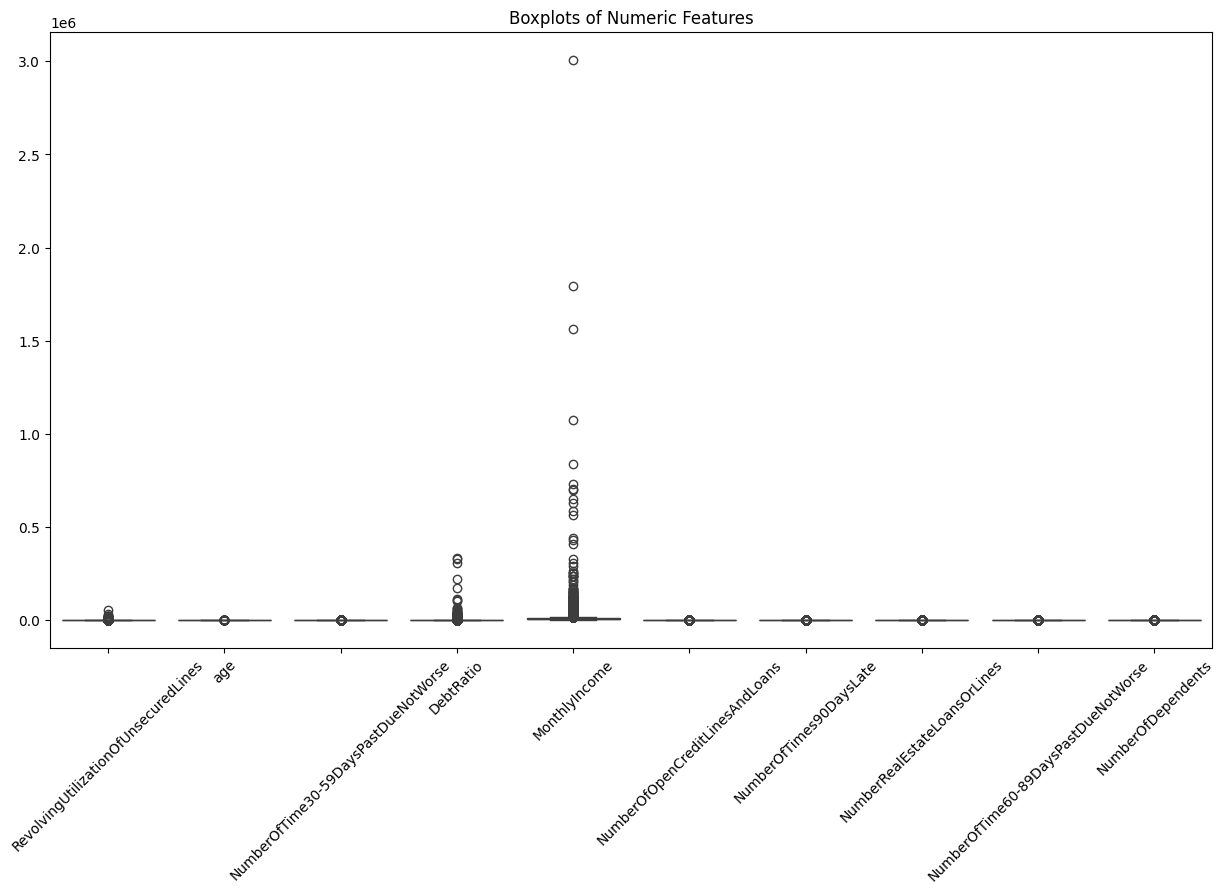

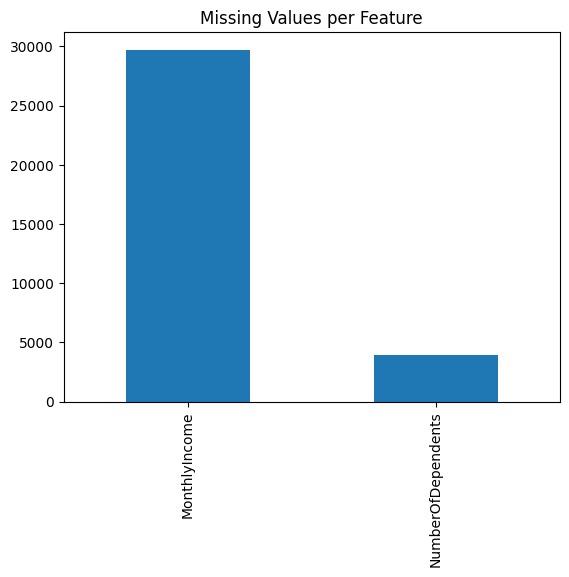

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("datasets/cs-training.csv")

# --- Basic cleanup ---
# Drop the extra index column (it’s just a redundant counter from the original CSV)
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
    
# Target distribution
sns.countplot(x='SeriousDlqin2yrs', data=data)
plt.title("Target Variable Distribution")
plt.show()

# Histograms for numeric columns
data.hist(bins=30, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=data.drop(columns=['SeriousDlqin2yrs']))
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Missing values visualization
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.plot(kind='bar', title='Missing Values per Feature')
plt.show()

In [14]:
data.describe() # Quantitative summary statistics of each feature column

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Key notes/interesting parts of summary statistics and variable visualizations

- Very low mean of `SeriousDlqin2yrs` - heavy imbalance towards `False` or `0` values
- Very low mean and 1st, 2nd, and 3rd quartile values compared to max of `RevolvingUtilizationOfUnsecuredLines` - shows that there are some extreme outlier(s)
- `age` is quite standard, follows near-normal distribution
- Very low mean and quartile values for `NumberOfTime30-59DaysPastDueNotWorse` while having some strong upper outliers
- Same thing for `DebtRatio`, `MonthlyIncome` (relatively), `NumberOfOpenCreditLinesAndLoans` (moderately), `NumberOfTimes90DaysLate`, `NumberRealEstateLoansOrLines`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfDependents`
- Suspect very high correlation amongst `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse` given the statistics look almost exactly the same
- Given the very small amount of outliers, suspecting that these outlying datapoints are the main contribution to the `True` or `1` values in `SeriousDlqin2yrs`

In [15]:
### Beginning quantitative data summary
data # General data view

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [16]:
data.shape # Data size (m rows, n columns)

(150000, 11)

In [17]:
data.info() # Data types, null counts of each feature column, also explained in the data dictionary
# Can also use data.dtypes for displaying solely Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

## Notes about data info

- 150000 total datapoints, 11 feature variables
- 29731 missing values in `MonthlyIncome` variable
- 3924 missing values in `NumberOfDependents` variable

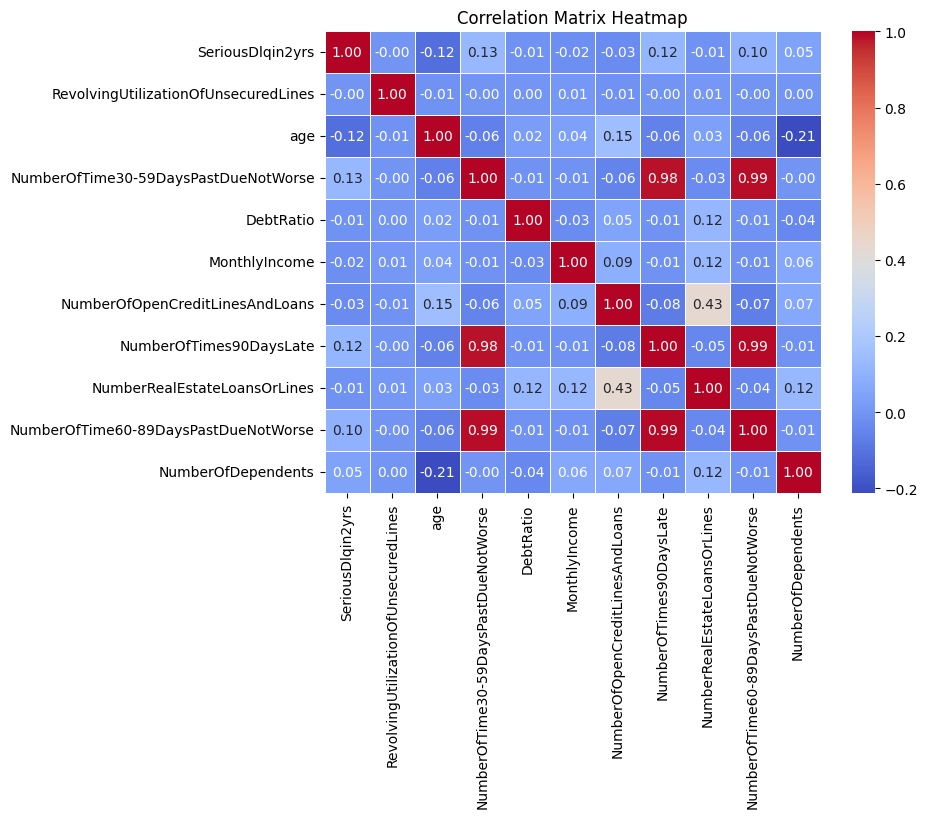

In [18]:
# Plot correlation matrix to see correlation amongst feature variables
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Notes on correlation

- High correlation found between `NumberOfTime30-59DaysPastDueNotWorse` and the two features `NumberOfTimes90DaysLate`and `NumberOfTime60-89DaysPastDueNotWorse` (multi-colinearity)
- High corrrelation amongst `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`
- Moderate correlation found between `NumberOfOpenCreditLinesAndLoans` and `NumberRealEstateLoansOrLines`

# Executive Summary of EDA

- Total of 150000 data samples across 1 boolean, 6 integer, and 4 decimal feature variables (total of 11 feature variables)
- Numerous outliers present in data which is very likely reason for heavy class imbalance towards `0` of `SeriousDlqin2yrs`
    - Suspect these outliers are the main datapoints where `SeriousDlqin2yrs` has value of `1`
- Correleation amongst 2 pairs of feature variables, multi-colinearity amongst 3 feature variables

# Challenges and Strategies

Following our EDA we have identified some challenges with the dataset and potential strategies:

### 1. Missing Values
- 29731 missing values in `MonthlyIncome` variable
- 3924 missing values in `NumberOfDependents` variable

These missing values can be addressed by using median imputation which should be more resistant to outliers than using the mean. Although univariate imputation can reduce variance artificially, it is easy to implement and inexpensive to calculate.


### 2. Outliers 
A few of the variables have extreme outliers:

- `RevolvingUtilizationOfUnsecuredLines` Min: 0, 50%: 0.154181, max: 50708.00
- `DebtRatio` Min: 0, 50%: 0.366508, max: 329664.00 
- `MonthlyIncome` Min: 0, 50%: 5400.00, Max: 3008750.00

We can create an upper fence for outliers using the interquartile range.

Q1: 25th Percentile
Q3: 75th Percentile
IQR: Q3 - Q1 
Upper limit: Q3 +1.5(IQR)

Then we can replace extreme values with the upper fence. This way we deal with outliers without throwing out thousands of datapoints. **However**, it is important to note that these outliers may actually be crucial to the positive outcomes found in `SeriousDlqin2yrs`, so we may attempt models with both the capping and without to see if there are big differences in the findings of our model and see which one makes more sense.



### 3. Multicollinearity
As discussed earlier, we found high correlation between these three variables:
- `NumberOfTime30-59DaysPastDueNotWorse`
- `NumberOfTime60-89DaysPastDueNotWorse`  
- `NumberOfTimes90DaysLate`

One solution is to combine all three variables into one so that preserve the information while removing the multicollinearity.

### 4. Imbalance
The target variable `SeriousDlqin2yrs` is only positive in ~6.7% of cases.

If the model we choose supports it we can use the class_weight="balanced" parameter to deal with the imbalance.

### Application of Strategies


In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 



# 1. Missing Values

median_imputer = SimpleImputer(strategy='median')
imputation_cols = ['MonthlyIncome', 'NumberOfDependents']

# Apply median imputation to columns with missing values
data[imputation_cols] = median_imputer.fit_transform(data[imputation_cols])

print("Missing value counts after imputation:")
print(data.isnull().sum().loc[imputation_cols])
print("\n")



# 2. Outliers

outlier_cols = [
    'RevolvingUtilizationOfUnsecuredLines',
    'DebtRatio',
    'MonthlyIncome'
]

def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    initial_outliers = (df[col] > upper_fence).sum()
    
    # Apply the capping
    df[col] = np.where(
        df[col] > upper_fence,
        upper_fence,
        df[col]
    )
    print(f"Capped {initial_outliers} values in {col}. New Max: {df[col].max():.2f}")
    return df

for col in outlier_cols:
    data = cap_outliers_iqr(data, col)
print("\n")



# 3. Multicollinearity

# Combine the three features into one
data['Total_Times_Past_Due'] = (
    data['NumberOfTime30-59DaysPastDueNotWorse'] +
    data['NumberOfTime60-89DaysPastDueNotWorse'] +
    data['NumberOfTimes90DaysLate']
)
# Drop the old features
data = data.drop(columns=[
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
])
data.info()

Missing value counts after imputation:
MonthlyIncome         0
NumberOfDependents    0
dtype: int64


Capped 763 values in RevolvingUtilizationOfUnsecuredLines. New Max: 1.35
Capped 31311 values in DebtRatio. New Max: 1.91
Capped 9149 values in MonthlyIncome. New Max: 12645.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         150000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberRealEstateLoansOrLines          150000 non-null  int64 

### Challenges Conclusion

We have now dealt with the missing values, capped thousands of extreme outliers (if necessary) and combined three features to deal with multicollinearity. The dataset should now be prepared for use with the model. The final challenge is the class imbalance which we hope to address by using the class_weight='balanced' parameter in the model. 

# Individual Contributions

| Name | Work Contributed |
|---|---|
| Emanuel Caravaggio | Data Dictionary |
| Patrick Favret | Challenges and Strategies |
| Junoh Loy | Visualizations and graphs of key variables and statistics |
| Edward Tanurkov | Dataset Choice, Quantitative EDA and notes (no visualizations) |